**<h1>DATA SCIENCE 3/3 MANUAL** 


<h1>Training ManualML Medische Data - Scikitlearn

<h4> Import Libraries

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')


Mounted at /content/gdrive


<h4>Load the data from the CSV file using Pandas

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/Datasets/Medische_dataset/medisch-centrum-randstad.csv")



<h4>Split the data into features (X) and target (y)

In [ ]:
X = data[["genetic", "length", "mass", "exercise", "smoking", "alcohol", "sugar"]]
y = data["lifespan"]

<h4>Split the data into training and validation sets

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

<h4>Define the base models

In [ ]:
# Define the advanced models
advanced_models = [
    XGBRegressor(n_estimators=100, max_depth=4, objective="reg:squarederror"),
    LGBMRegressor(n_estimators=100, max_depth=4)
]

In [ ]:
# Define the hyperparameter grids for each model
param_grids = [
    {
        "learning_rate": [0.001, 0.02, 0.3],
        "max_depth": [3, 4, 5 ],
        "n_estimators": [100, 200, 300, ]
    },
    {
        "learning_rate": [0.001, 0.02, 0.3],
        "max_depth": [3, 4, 5],
        "n_estimators": [100, 200, 300]
    }
]

<h4>Train the base models on the training data

In [ ]:
best_models = []

In [ ]:
for model, param_grid in zip(advanced_models, param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)

<h4>Generate predictions on the validation set using each base model

In [ ]:
preds = [model.predict(X) for model in best_models]

NameError: ignored

In [ ]:
# Concatenate the predictions and the target values
ensemble_preds = pd.DataFrame({"predict": preds[0]}).astype('int64')
ensemble_preds["lifespan"] = y


# Evaluate the accuracy of the stacked ensemble model
ensemble_acc = (round(ensemble_preds["predict"], 0) == ensemble_preds["lifespan"]).mean()
print(f"mean: {ensemble_acc}")
ensemble_preds

mean: 0.14013671875


,predict,lifespan
0,57,57
1,57,59
2,75,73
3,70,69
4,83,84
...,...,...
4091,91,90
4092,85,88
4093,65,62
4094,91,93


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

import math

# Calculate the MSE and MAE
mse = mean_squared_error(ensemble_preds["lifespan"], ensemble_preds["predict"])
rmse = math.sqrt(mse)
mae = mean_absolute_error(ensemble_preds["lifespan"], ensemble_preds["predict"])

# Print the results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 7.73
RMSE: 2.78
MAE: 2.22


<h4> Calculate the confusion matrix

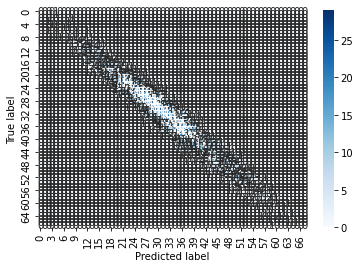

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ensemble_preds["lifespan"], ensemble_preds["predict"])


import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


|index|predict|lifespan|
|---|---|---|
|0|56|57|
|1|58|59|
|2|75|73|
|3|68|69|
|4|82|84|
|5|78|78|
|6|97|97|
|7|71|66|
|8|80|82|
|9|65|64|
|10|67|68|
|11|91|92|
|12|79|75|
|13|72|77|
|14|78|76|
|15|55|53|
|16|72|72|



<h4>Visualization with plot

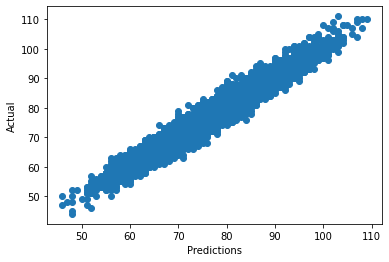

In [ ]:
import matplotlib.pyplot as plt

# Extract the values from the H2OFrame objects
predictions = ensemble_preds["predict"]
actual = ensemble_preds["lifespan"]
# Create a scatter plot of the predictions and actual values
plt.scatter(predictions, actual)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

<h4> Save model

In [ ]:
import pickle

# Save the model to a file
with open('/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Manual_scikitlearn.pkl', 'wb') as file:
  pickle.dump(best_models, file)



In [ ]:
 import joblib


# Save the model to a file
joblib.dump(model, "/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Manual_scikitlearn1.pkl")

['/content/gdrive/My Drive/Datasets/Medische_dataset/Medische_data_model_Manual_scikitlearn1.pkl']

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 35.1 MB/s 


Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


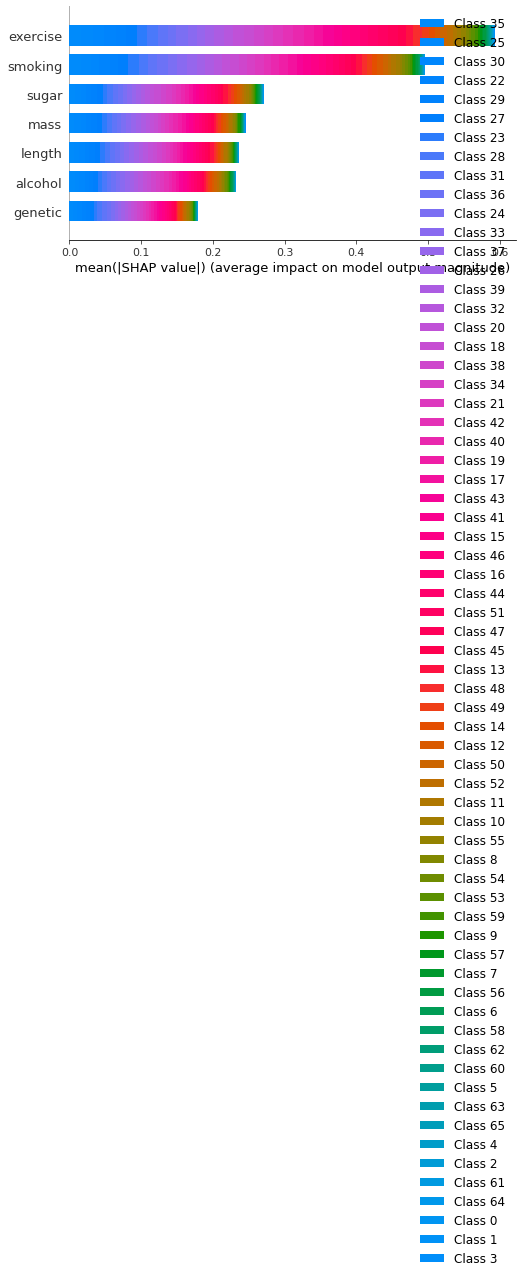

In [ ]:
import shap

# train a model using scikit-learn
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# use shap to explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_valid)

# plot the explanations
shap.summary_plot(shap_values, X_valid)

In [ ]:
importances = model.feature_importances_


In [ ]:
importances

array([0.13339212, 0.2122027 , 0.20639105, 0.05041149, 0.17188426,
       0.14952933, 0.07618905])

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 37.1 MB/s 
     |████████████████████████████████| 133 kB 68.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=ef585f5a0ea8c8e12e0cb6f191d4ef8b0a9ca7bf31db55e66556a8c1eb491ca1
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
feature_names = ["genetic", "length", "mass", "exercise", "smoking", "alcohol", "sugar"]

# Calculate permutation importance
perm = PermutationImportance(model, random_state=1).fit(X, y)

# Print permutation importance
eli5.show_weights(perm, feature_names=feature_names)


Weight,Feature
0.4558 ± 0.0128,smoking
0.4549 ± 0.0087,exercise
0.2317 ± 0.0077,sugar
0.2083 ± 0.0095,mass
0.1918 ± 0.0084,length
0.1629 ± 0.0089,alcohol
0.0713 ± 0.0089,genetic


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Train a model using scikit-learn
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Compute permutation importance
perm = PermutationImportance(model).fit(X_valid, y_valid)

# Select a particular input
X_input = X_valid.iloc[1]
print(X_input)
# Print the permutation importance for each feature
eli5.show_weights(perm, feature_names=feature_names)


genetic      81
length      189
mass        107
exercise      2
smoking      21
alcohol       7
sugar         2
Name: 3911, dtype: int64


Weight,Feature
0.0307 ± 0.0078,exercise
0.0168 ± 0.0175,mass
0.0083 ± 0.0111,genetic
-0.0024 ± 0.0064,alcohol
-0.0029 ± 0.0091,smoking
-0.0054 ± 0.0110,length
-0.0090 ± 0.0208,sugar


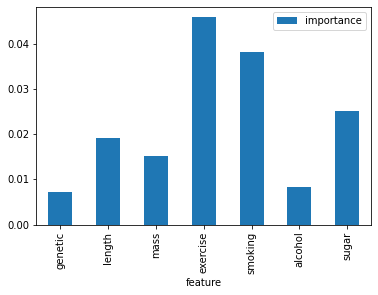

In [ ]:
import pandas as pd
feature_names = list(X.columns)

# Convert permutation importance to a DataFrame
df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm.feature_importances_
})
# Plot permutation importance
df.plot(kind='bar', x='feature', y='importance')
plt.show()

genetic      83
length      192
mass         78
exercise      3
smoking      16
alcohol       7
sugar         3
Name: 3998, dtype: int64


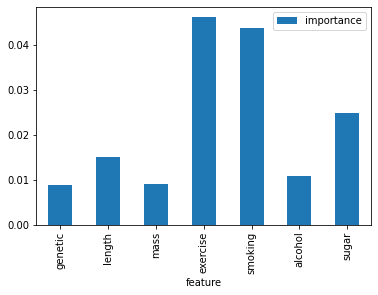

In [ ]:
# First, define the input data


# X_input = [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]] 
X_input = X_valid.iloc[3] 
print(X_input)
# Calculate permutation importance
perm = PermutationImportance(model, random_state=1).fit(X_valid, y_valid, X_input)

# Convert permutation importance to a DataFrame
df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm.feature_importances_
})

# Plot permutation importance
df.plot(kind='bar', x='feature', y='importance')
plt.show()


In [ ]:
# initialize the explainer object
explainer = shap.TreeExplainer(model)

# compute the shap values for the test data
shap_values = explainer.shap_values(X_valid)
